$\textit{Polinomios de Legendre} $ 



En nuestro campo de estudio hay variedad de problemas en los cuales la problemática está en la resolución de ecuaciones diferenciales que involucren el Laplaciano de una función $\Phi$:


<center>$\nabla^2 \Phi$

    
Por lo que si tenemos que la función $\Phi$ = $\Phi(x,y,z)$, el lapaciano de la función quedaría de la forma:
        
<center>$\nabla^2 \Phi$ = ($\frac{\delta^2 \Phi}{\delta x^2}$) + ($\frac{\delta^2 \Phi}{\delta x^2}$) + ($\frac{\delta^2 \Phi}{\delta x^2}$)
    
Sin embargo tambien sabemos que en este tipo de ecuaciones la elección de coordenadas es crucial para una óptima resolución de la misma, por lo que la función $\Phi(x,y,z)$ se puede transformar entonces a una $\Phi(r,\theta, \phi)$ para que sea expresada en coordenadas esféricas. De igual forma el Laplaciano en coordenadas esféricas aplicado a $\Phi$ es:
<center>$\nabla^2 \Phi$ = $\frac{1}{r²}\frac{\delta}{\delta r} [r²\frac{\delta \Phi}{\delta r}]$ + $\frac{1}{r²sin(\theta)}\frac{\delta}{\delta \phi}[\frac{1}{sin(\theta)}\frac{\delta \Phi}{\delta \phi}]$ + $\frac{1}{r²sin(\theta)}\frac{\delta}{\delta \theta}[sin(\theta)\frac{\delta \Phi}{\delta \theta}]$

Sin embargo podemos considerar que $\Phi$ es separable, es decir que $\Phi(r, \theta, \phi)$ = $R(r)Y(\theta, \phi)$, el laplaciano quedará expresado como:
<center> $\nabla^2 \Phi$ = $Y(\phi,\theta)[\frac{d^2R}{dr} + \frac{2}{r} \frac{dR}{dr}]$ + $R(r)\frac{1}{r^2}[\frac{1}{sin(\theta)}\frac{\delta}{\delta \theta}[sin(\theta)\frac{\delta Y(\phi,\theta)}{\delta \theta}] + \frac{1}{sin^2(\theta)}\frac{\delta^2Y(\phi,\theta)}{\delta \phi^2}]$



Notamos que el laplaciano tambien está "separado", con parciales angulares en una parte y totales radiales de otra, sin embargo notamos que la parte radial está multiplicando a las parciales angulares, mientras la parte angular está multiplicando a las parcial

In [11]:
import numpy as np
import sympy as sy
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt

In [12]:
import sympy as sp

def legendre_polynomial_symbolic(n, x):
    return sp.legendre(n, x)

x = sp.symbols('x')

n = 8

legendre_poly = legendre_polynomial_symbolic(n, x)

print(f"Polinomio de Legendre de grado {n}: {legendre_poly}")

Polinomio de Legendre de grado 8: 6435*x**8/128 - 3003*x**6/32 + 3465*x**4/64 - 315*x**2/32 + 35/128


In [13]:
leg = sy.lambdify(x,legendre_poly)

In [14]:
x = sy.symbols('x')
sy.solveset(sy.Eq(legendre_poly,0 )).n()


KeyboardInterrupt: 

In [15]:
a_1=sy.diff(legendre_poly,x)
a_2=sy.lambdify(x,a_1)
print(a_1)

6435*x**7/16 - 9009*x**5/16 + 3465*x**3/16 - 315*x/16


Text(0.5, 1.0, 'Gráfica de la función F(X)')

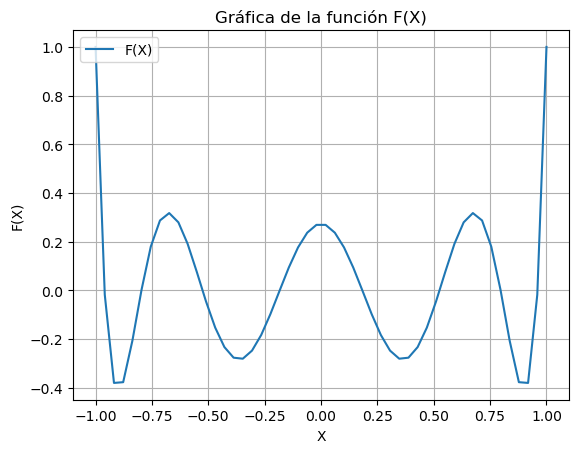

In [16]:
X = np.linspace(-1,1)
a=leg(X)
plt.plot(X,a,label = "F(X)")
plt.legend(loc=2)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("F(X)")
plt.title("Gráfica de la función F(X)")

In [17]:
def new1(y,x):
    X=x-(leg(x))/(a_2(x))
    y=y+1
    print(X)
    f=np.abs(X-x)
    print(f)
    print("\n\n")
    if f<(1e-15):
        print("El número de iteraciones fue:",y)
        return X
    else:
        return new1(y,X)

In [19]:
y=0
x=-1
new1(y,x)

-0.9722222222222222
0.02777777777777779



-0.9617646069723288
0.010457615249893415



-0.9603160653530544
0.001448541619274435



-0.9602898649677387
2.6200385315644503e-05



-0.9602898564975375
8.47020120708919e-09



-0.9602898564975372
3.3306690738754696e-16



El número de iteraciones fue: 6


-0.9602898564975372